In [1]:
%load_ext autoreload

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s') # NOTSET, DEBUG, INFO, WARN, ERROR, CRITICAL

from JPAS_DA.data import loading_tools
from JPAS_DA.data import cleaning_tools

import numpy as np

from JPAS_DA.utils import plotting_utils
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')
font, rcnew = plotting_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%matplotlib widget

In [2]:
root_path = "/home/dlopez/Documents/Projects/JPAS_Domain_Adaptation/DATA/noise_jpas_v1/Train-Validate-Test"

load_JPAS_data = [{
    "name": "all",
    "npy": "JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy",
    "csv": "JPAS_DATA_PROPERTIES.csv",
    "sample_percentage": 1.0  # Optional, defaults to 1.0
}]

load_DESI_data = [
{
    "name": "train",
    "npy": "mock_3_train.npy",
    "csv": "props_training.csv",
    "sample_percentage": 0.3
},
{
    "name": "val",
    "npy": "mock_3_validate.npy",
    "csv": "props_validate.csv",
    "sample_percentage": 1.0
},
{
    "name": "test",
    "npy": "mock_3_test.npy",
    "csv": "props_test.csv",
    "sample_percentage": 1.0
}
]

random_seed_load = 42

In [3]:
DATA = loading_tools.load_dsets(root_path=root_path, datasets_jpas=load_JPAS_data, datasets_desi=load_DESI_data, random_seed=random_seed_load)

2025-05-16 12:47:17,905 - INFO - 📥 Starting full dataset loading with `load_dsets()`
2025-05-16 12:47:17,905 - INFO - ├ Loading JPAS datasets...
2025-05-16 12:47:17,905 - INFO - ├─── 📥 Starting JPAS dataset loading...
2025-05-16 12:47:17,905 - INFO - |    ├─── 🔹 Dataset: all (sample 100%)
2025-05-16 12:47:17,948 - INFO - |    |    ✔ CSV loaded: JPAS_DATA_PROPERTIES.csv (shape: (52020, 18))
2025-05-16 12:47:17,960 - INFO - |    |    ✔ NPY loaded: JPAS_DATA_Aper_Cor_3_FLUX+NOISE.npy (obs shape: (52020, 57))
2025-05-16 12:47:17,960 - INFO - ├─── ✅ Finished loading all JPAS datasets.
2025-05-16 12:47:17,961 - INFO - ├ Loading DESI datasets (splitted)...
2025-05-16 12:47:17,962 - INFO - ├─── 📥 Starting DESI dataset loading...
2025-05-16 12:47:17,962 - INFO - |    ├─── 🔹 Dataset: train
2025-05-16 12:47:18,880 - INFO - |    |    ✔ CSV loaded ((1087882, 18)), Size: 445.74 MB
2025-05-16 12:47:18,881 - INFO - |    |    ✔ NPY loaded ((1087882, 57, 3)), Size: 1488.22 MB
2025-05-16 12:47:18,887 - I

In [4]:
dict_clean_data_options = {
    "apply_masks"         : ["unreliable", "magic_numbers", "negative_errors", "nan_values", "apply_additional_filters"],
    "mask_indices"        : [0, -2],
    "magic_numbers"       : [-99, 99],
    "i_band_sn_threshold" : 0,
    "z_lim_QSO_cut"       : 2.2
}

In [5]:
DATA_clean = cleaning_tools.clean_and_mask_data(
    DATA=DATA,
    apply_masks=dict_clean_data_options["apply_masks"],
    mask_indices=dict_clean_data_options["mask_indices"],
    magic_numbers=dict_clean_data_options["magic_numbers"],
    i_band_sn_threshold=dict_clean_data_options["i_band_sn_threshold"],
    z_lim_QSO_cut=dict_clean_data_options["z_lim_QSO_cut"]
)

2025-05-16 12:47:19,913 - INFO - 🧽 Cleaning and masking data...
2025-05-16 12:47:19,913 - INFO - ├── remove_invalid_NaN_rows()
2025-05-16 12:47:20,105 - INFO - │   ├── # objects filled with NaNs in JPAS: 0(0.0%)
2025-05-16 12:47:20,106 - INFO - │   ├── # objects filled with NaNs in DESI: 505(0.06%)
2025-05-16 12:47:20,515 - INFO - ├── 🧹 Deleted cleaned DATA_clean dictionary to free memory.
2025-05-16 12:47:20,516 - INFO - ├── apply_additional_filters()
2025-05-16 12:47:20,525 - INFO - │   ├── JPAS: 52020 valid rows (S/N ≥ 0) (100.0%)
2025-05-16 12:47:20,526 - INFO - │   ├── DESI: 792095 valid rows (S/N ≥ 0) (100.0%)
2025-05-16 12:47:20,791 - INFO - │   ├── Additional filters applied successfully.
2025-05-16 12:47:20,792 - INFO - ├── Masking out indices [0, -2] (unreliable in DESI).
2025-05-16 12:47:21,266 - INFO - │   ├── Updated JPAS obs/err shape: (52020, 55)
2025-05-16 12:47:21,266 - INFO - │   ├── Updated DESI mean/err shape: (792095, 55)
2025-05-16 12:47:21,267 - INFO - ├── Checki

In [6]:
DATA_clean['DESI'].keys()

dict_keys(['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'RA', 'DEC', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'EBV', 'MORPHTYPE', 'SPECTYPE', 'REDSHIFT', 'ISINJPAS', 'TILE_ID', 'NUMBER', 'NOISE_SEED', 'NOISE_TILE', 'mask_99', 'mask_neg99', 'mask_neg_errors', 'MEAN', 'OBS', 'ERR', 'SPECTYPE_int', 'MORPHTYPE_int'])

In [7]:
DATA_clean['JPAS'].keys()

dict_keys(['SURVEY', 'PROGRAM', 'HEALPIX', 'TARGETID', 'RA', 'DEC', 'DESI_FLUX_G', 'DESI_FLUX_R', 'DESI_FLUX_Z', 'EBV', 'MORPHTYPE', 'SPECTYPE', 'REDSHIFT', 'ISINJPAS', 'TILE_ID', 'NUMBER', 'NOISE_SEED', 'NOISE_TILE', 'mask_99', 'mask_neg99', 'mask_neg_errors', 'OBS', 'ERR', 'SPECTYPE_int', 'MORPHTYPE_int'])

JPAS - ratios: [0.71249519 0.01230296 0.03861976 0.23658208]
JPAS - Class_weights: [0.0497679  2.88218325 0.91816689 0.14988196]
DESI - ratios: [0.70456195 0.01503986 0.04284713 0.23755105]
DESI - Class_weights: [0.05947437 2.78615435 0.97797392 0.17639736]


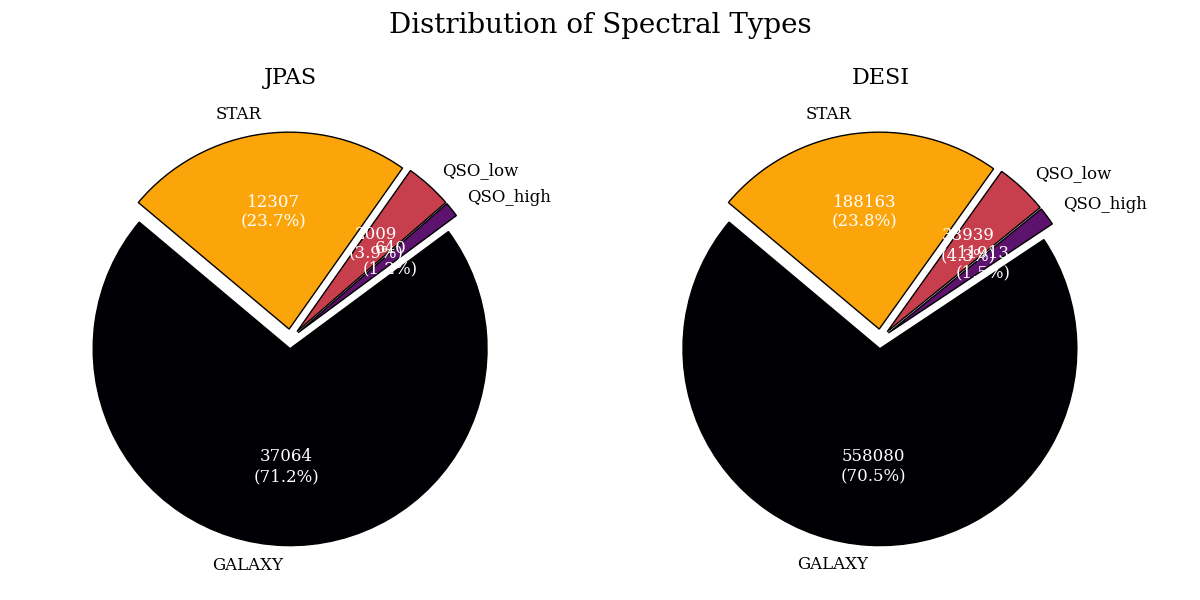

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ii, survey_key in enumerate(["JPAS", "DESI"]):

    unique_spectype_names, counts = np.unique(DATA_clean[survey_key]['SPECTYPE'], return_counts=True)

    ratios = counts / np.sum(counts)
    print(survey_key, "- ratios:", ratios)
    inverse_ratios = 1.0 / ratios
    class_weights = inverse_ratios / inverse_ratios.mean()
    print(survey_key, "- Class_weights:", class_weights)

    ax = axs[ii]
    colors = plt.cm.inferno(np.linspace(0., 0.8, len(counts)))
    explode = [0.05] * len(counts)

    # Function to display count and percentage in two lines
    def make_autopct(counts):
        def my_autopct(pct):
            total = sum(counts)
            absolute = int(round(pct * total / 100.0))
            return f"{absolute}\n({pct:.1f}%)"
        return my_autopct

    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=unique_spectype_names,
        autopct=make_autopct(counts),
        startangle=140,
        colors=colors,
        explode=explode,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        textprops={'fontsize': 12}
    )

    # Customize font color inside pie
    for autotext in autotexts:
        autotext.set_color("white")

    ax.set_title(f"{survey_key}", fontsize=16)

# General title
plt.suptitle("Distribution of Spectral Types", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()